===
Week3_class.Rmd
Requires: ISLR, quantmod, fpp, forecast
===




In [2]:
library(ISLR)
autos <- Auto
head(autos)
str(autos)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...



Question: what affects mpg?


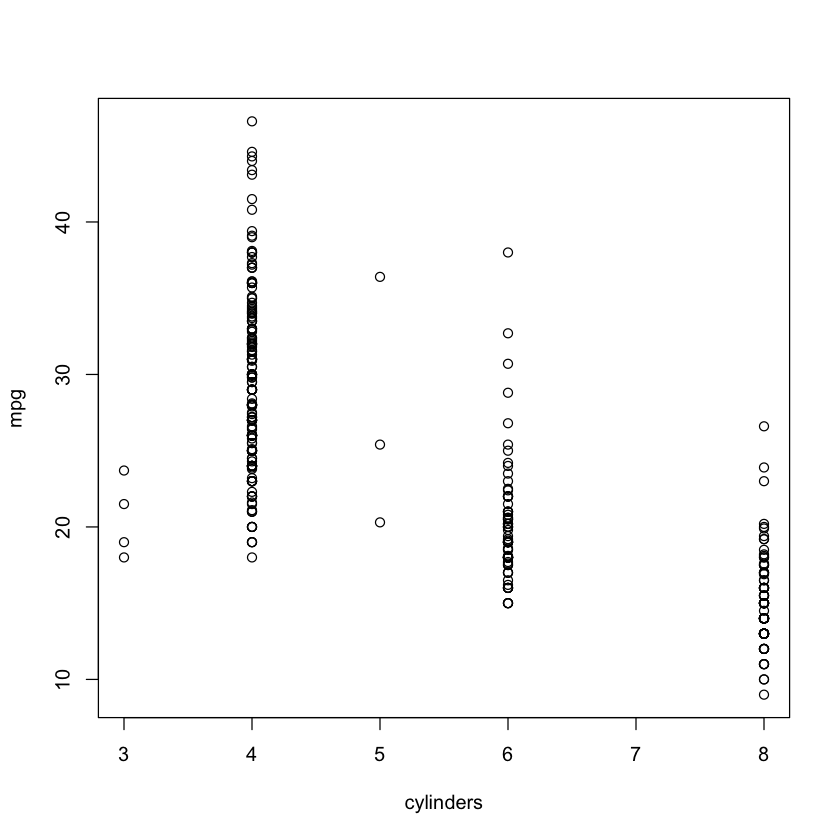

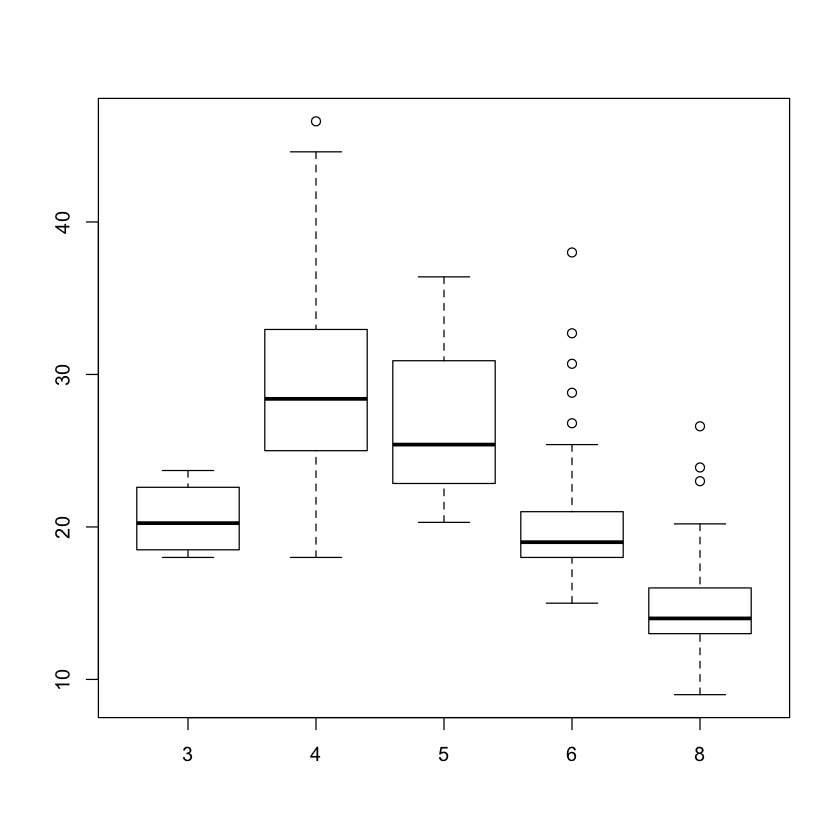

In [3]:
plot(mpg~cylinders, data=autos)
boxplot(mpg~cylinders, data=autos)



What about horsepower?


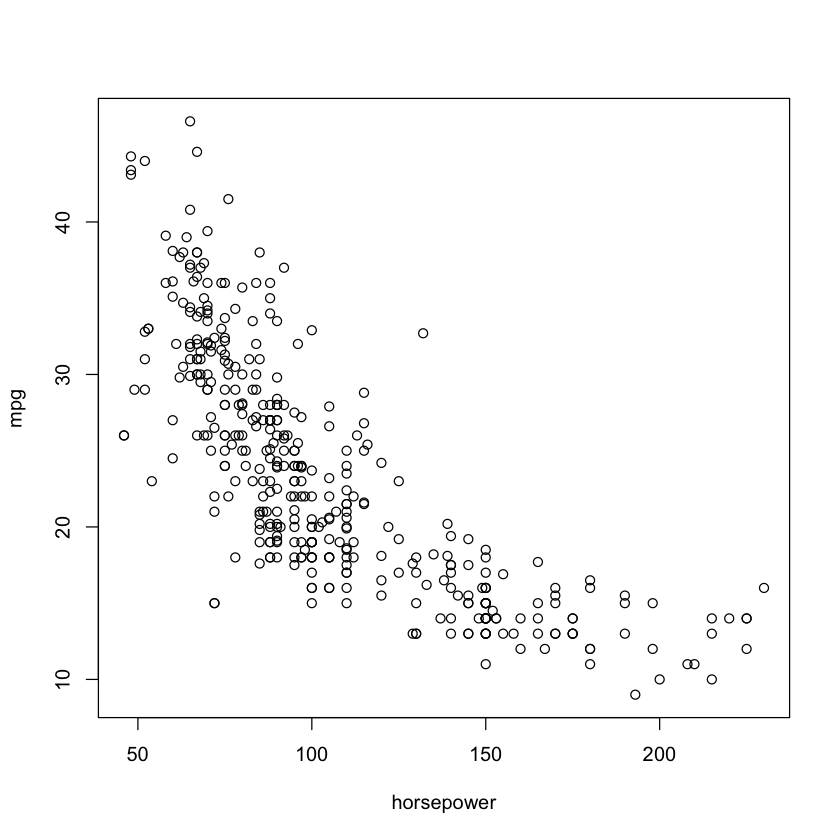

In [4]:
plot(mpg~horsepower,data=autos)



Are relationships linear?



Call:
lm(formula = mpg ~ horsepower, data = autos)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


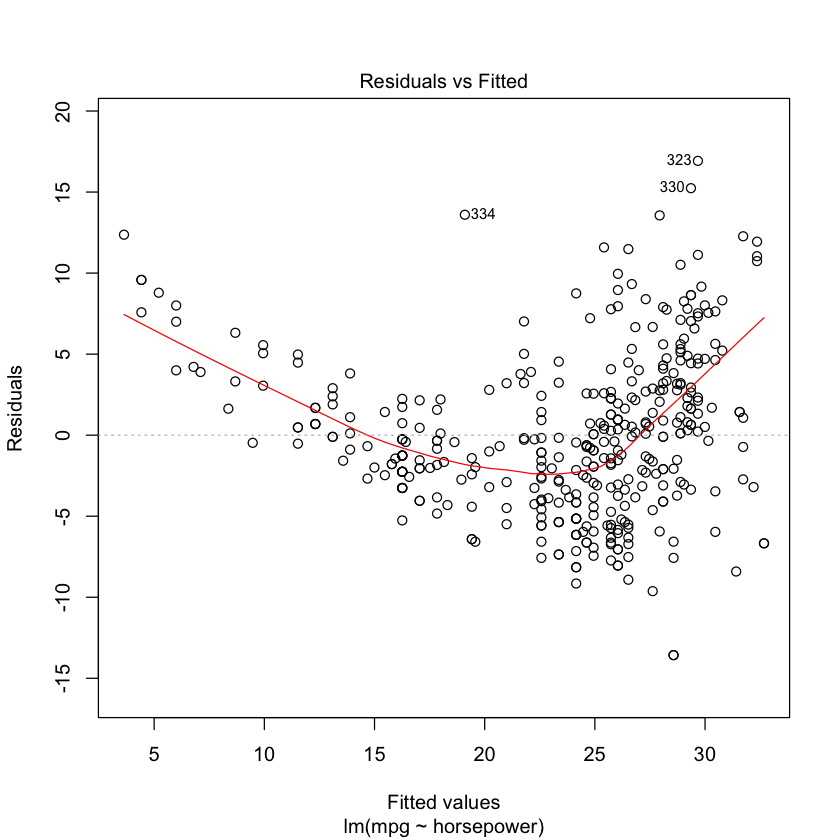

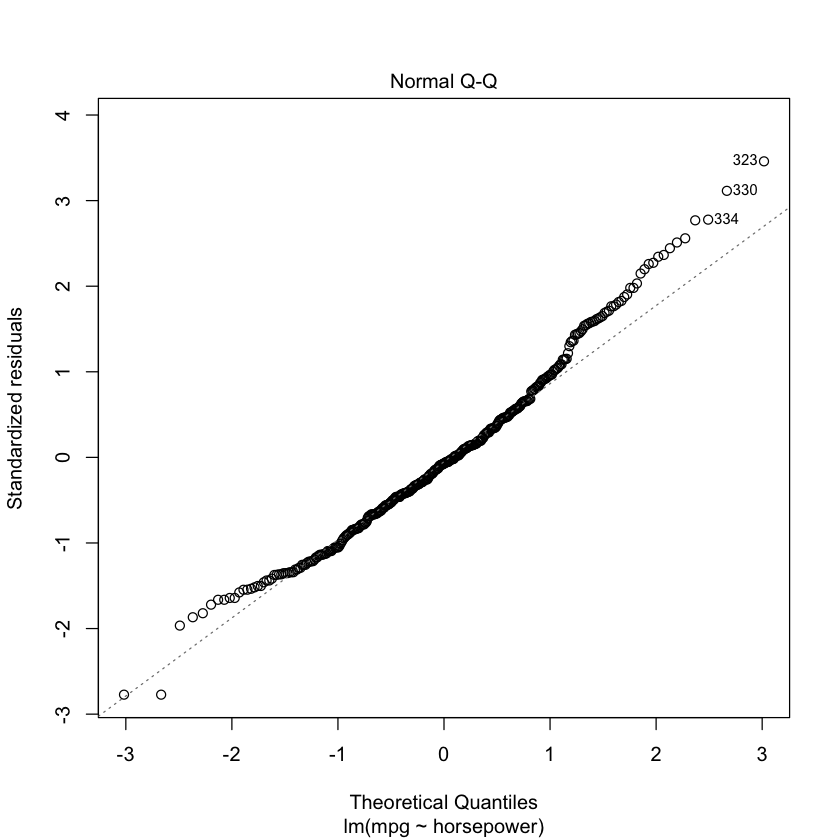

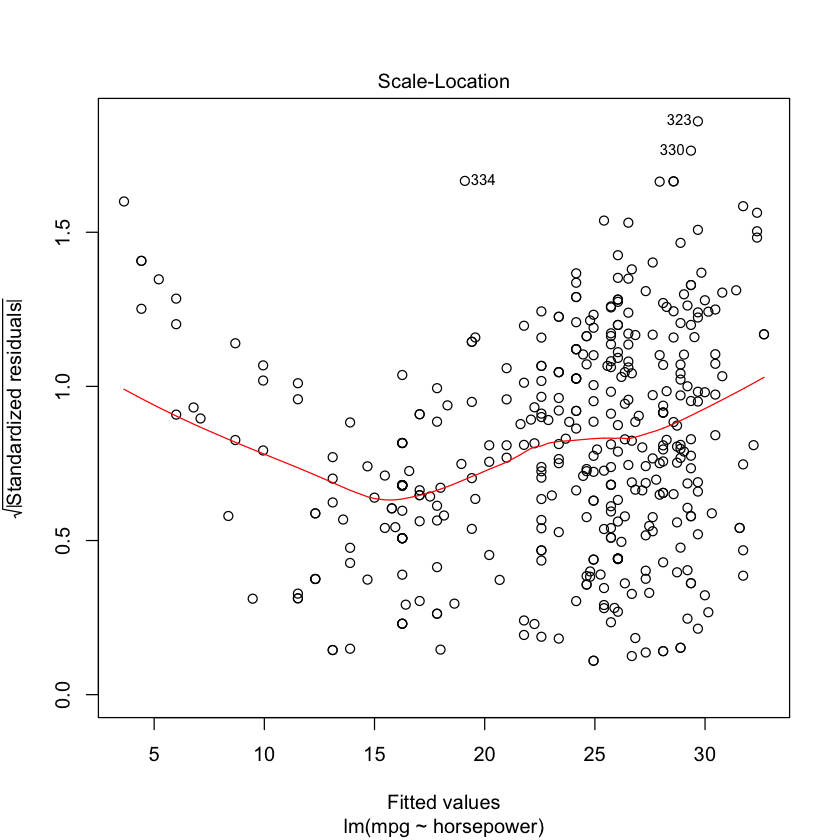

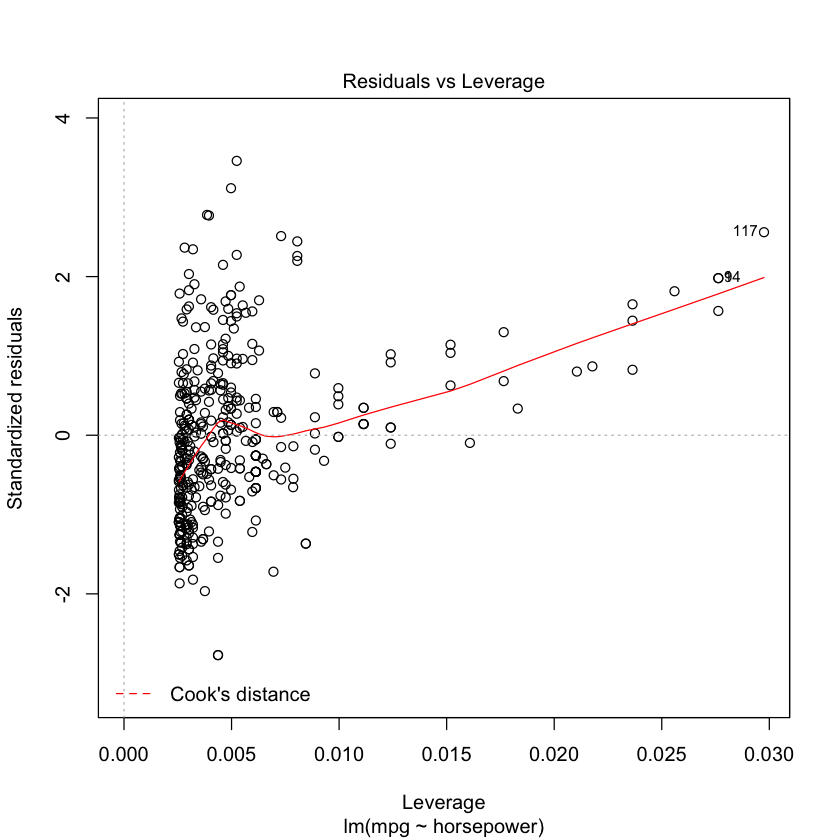

In [5]:
model1 <- lm(mpg~horsepower, data = autos)
summary(model1)
plot(model1)
abline(model1, col = "blue")



This relationship looks non-linear.  How do we capture that curve?  We can add a quadratic term

There are two ways to do this:
1. explicitly create the square and include it in the regression



In [6]:
autos$hpsq <- autos$horsepower^2
model2 <- lm(mpg~horsepower+ hpsq,data=autos)
summary(model2)


Call:
lm(formula = mpg ~ horsepower + hpsq, data = autos)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 56.9000997  1.8004268   31.60   <2e-16 ***
horsepower  -0.4661896  0.0311246  -14.98   <2e-16 ***
hpsq         0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


2. add quadratic term to regression only




Call:
lm(formula = mpg ~ horsepower + I(horsepower^2), data = autos)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     56.9000997  1.8004268   31.60   <2e-16 ***
horsepower      -0.4661896  0.0311246  -14.98   <2e-16 ***
I(horsepower^2)  0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


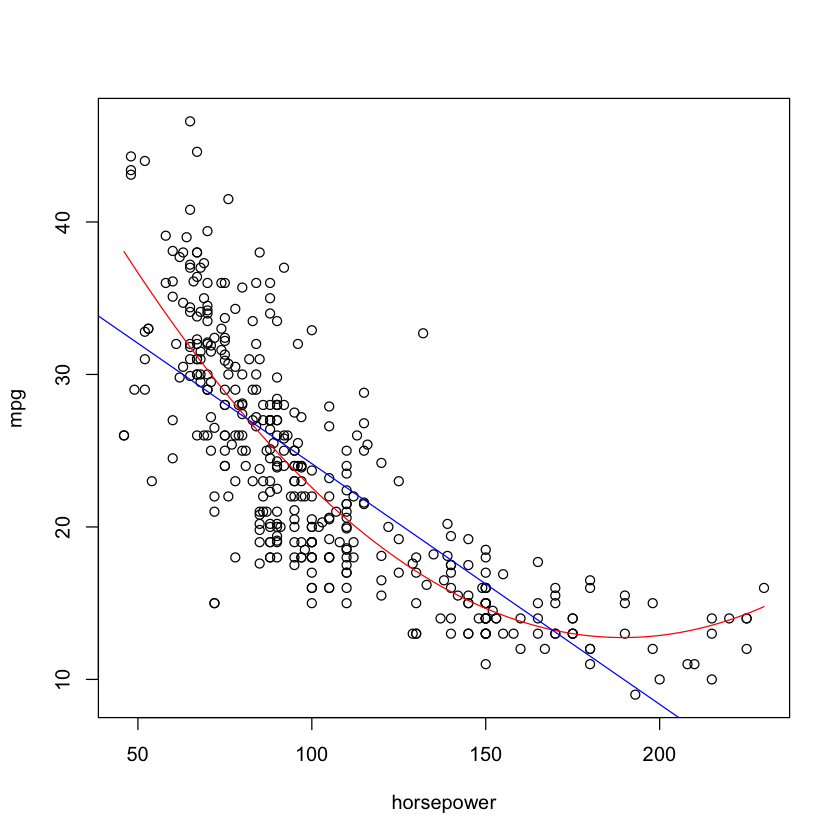

In [7]:
model2 <- lm(mpg~horsepower + I(horsepower^2), data = autos)
summary(model2)

plot(mpg~horsepower,data=autos)

# create 100 x-values based on min/max of plotted values
minMax = range(autos$horsepower)
xVals = seq(minMax[1], minMax[2], len = 100)

yVals = predict(model2, newdata = data.frame(horsepower=xVals))

lines(xVals, yVals, col = "red")
abline(model1, col = "blue")




What does the quadratic term do?  What does it mean?
if what does a one unit change in X imply for y?
Guess what?  It depends.

A one unit change from 50 to 51:


In [10]:
#numeric example HP = 50
mpg_50 <- model2$coefficients[1] + model2$coefficients[2]*50 + model2$coefficients[3]*50*50
# numeric example HP = 51
mpg_51 <- model2$coefficients[1] + model2$coefficients[2]*51 + model2$coefficients[3]*51*51

mpg_51 - mpg_50

(Intercept) 
 -0.3419055


Doesn't have the same effect as a one unit change between 150 and 151:



In [11]:
#numeric example HP = 150
mpg_150 <- model2$coefficients[1] + model2$coefficients[2]*150 + model2$coefficients[3]*150*150
# numeric example HP = 151
mpg_151 <- model2$coefficients[1] + model2$coefficients[2]*151 + model2$coefficients[3]*151*151

mpg_151 - mpg_150

(Intercept) 
-0.09579826


Remember, linear relationships are constant



In [12]:
#numeric example HP = 50
mpg_50 <- model1$coefficients[1] + model1$coefficients[2]*50
# numeric example HP = 51
mpg_51 <- model1$coefficients[1] + model1$coefficients[2]*51

mpg_51 - mpg_50


#numeric example HP = 50
mpg_150 <- model1$coefficients[1] + model1$coefficients[2]*150
# numeric example HP = 51
mpg_151 <- model1$coefficients[1] + model1$coefficients[2]*151

mpg_151 - mpg_150

(Intercept) 
 -0.1578447

(Intercept) 
 -0.1578447


Effects of time.  Linear regression with trend -
the tslm package is a linear regression package for time series. It has some lovely things built into it already, like the concept of trend.


In [13]:
library(forecast)
library(fpp)
ibmclose.t <- tslm(ibmclose ~ trend)
summary(ibmclose.t)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest



Call:
tslm(formula = ibmclose ~ trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-128.450  -50.756   -9.968   67.138   89.995 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 574.27398    6.64153   86.47   <2e-16 ***
trend        -0.51787    0.03111  -16.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.66 on 367 degrees of freedom
Multiple R-squared:  0.4302,	Adjusted R-squared:  0.4286 
F-statistic: 277.1 on 1 and 367 DF,  p-value: < 2.2e-16


We can use this to forecast - either in sample using a test/train split or out of sample.



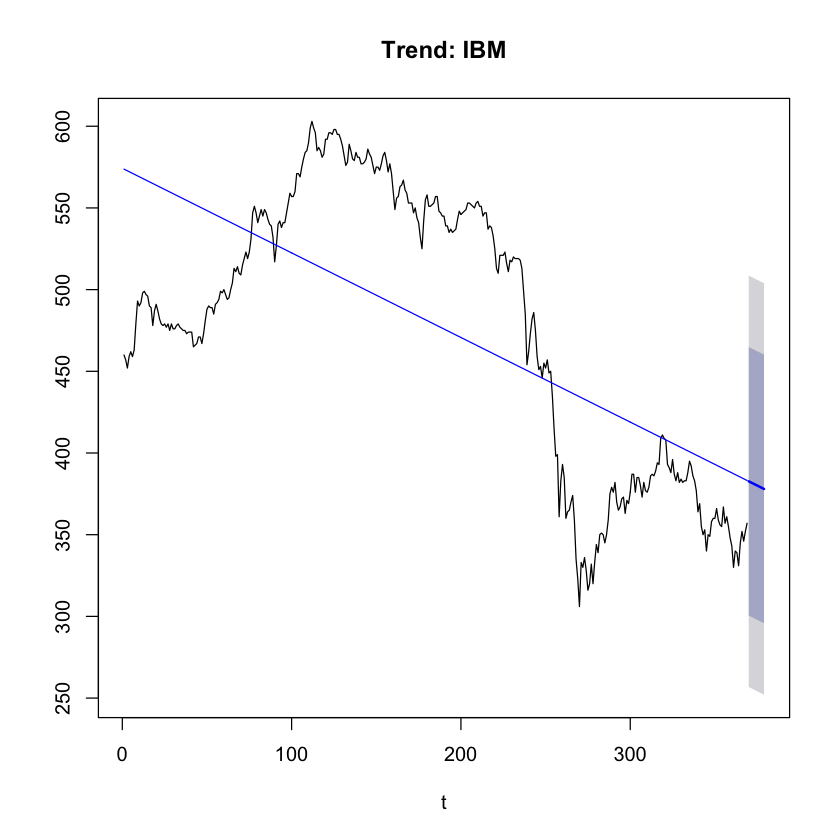

In [14]:
ibmclose.f <-forecast(ibmclose.t)
plot(ibmclose.f, main = "Trend: IBM", xlab = "t")
lines(fitted(ibmclose.t), col = "blue")

How about home sales?




In [15]:
hsales.t <- tslm(hsales ~ trend)
summary(hsales.t)


Call:
tslm(formula = hsales ~ trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.203  -8.201   0.629   6.722  36.697 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.219e+01  1.446e+00  36.079   <2e-16 ***
trend       7.374e-04  9.085e-03   0.081    0.935    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.96 on 273 degrees of freedom
Multiple R-squared:  2.413e-05,	Adjusted R-squared:  -0.003639 
F-statistic: 0.006588 on 1 and 273 DF,  p-value: 0.9354



Doesn't look like a trend model is helpful here




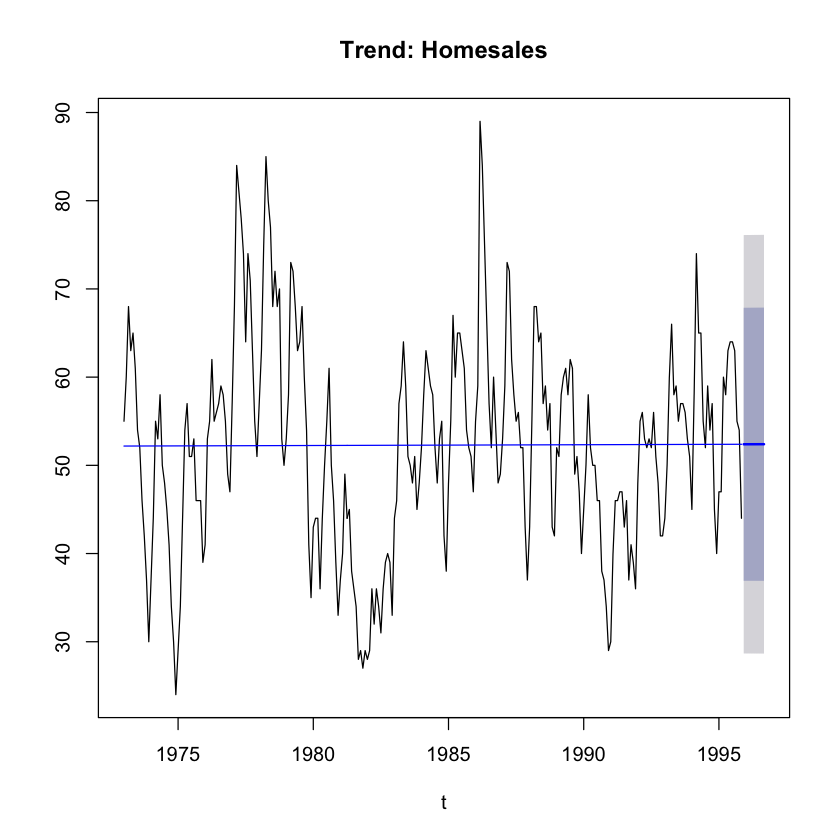

In [16]:
hsales.f <-forecast(hsales.t)
plot(hsales.f, main = "Trend: Homesales", xlab = "t")
lines(fitted(hsales.t), col = "blue")


Where might it be helpful?



Loading required package: xts
Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.
    As of 0.4-0, ‘getSymbols’ uses env=parent.frame() and
 auto.assign=TRUE by default.

 This  behavior  will be  phased out in 0.5-0  when the call  will
 default to use auto.assign=FALSE. getOption("getSymbols.env") and 
 getOptions("getSymbols.auto.assign") are now checked for alternate defaults

 This message is shown once per session and may be disabled by setting 
 options("getSymbols.warning4.0"=FALSE). See ?getSymbols for more details.


[1] "GDP"


Call:
tslm(formula = gdp ~ trend)

Residuals:
   Min     1Q Median     3Q    Max 
-811.9 -535.0  -68.6  501.0 1158.2 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1527.930     90.751   16.84   <2e-16 ***
trend        110.417      1.071  103.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 545.5 on 144 degrees of freedom
Multiple R-squared:  0.9866,	Adjusted R-squared:  0.9865 
F-statistic: 1.063e+04 on 1 and 144 DF,  p-value: < 2.2e-16


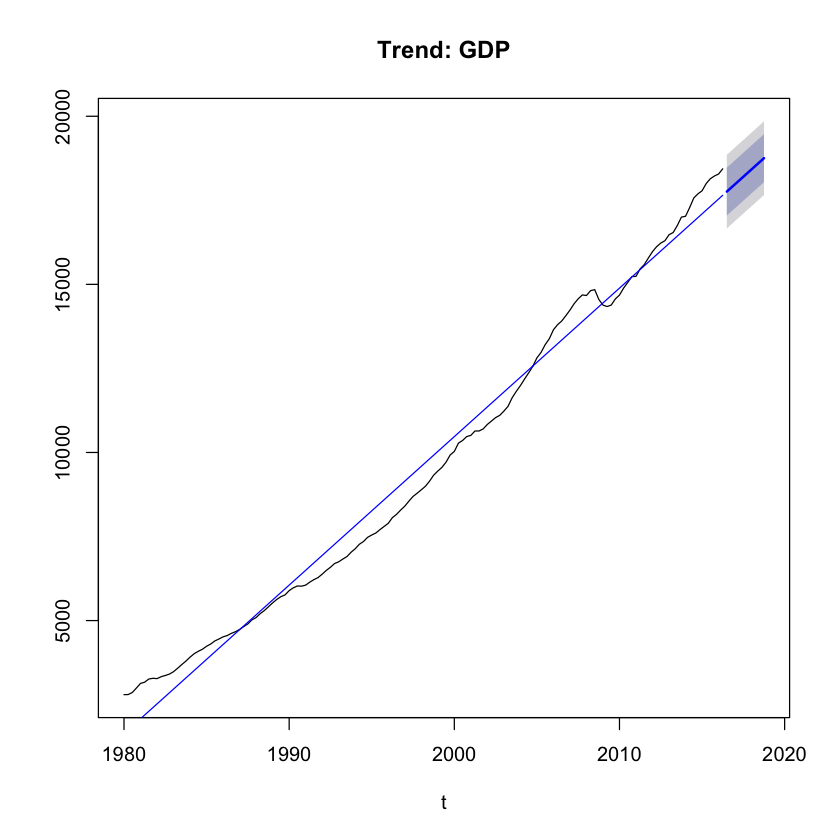

In [17]:
library(quantmod)
getSymbols("GDP", src="FRED")
gdp <- ts(window(GDP, start = "1980-01-01"), start = c(1980,1), freq = 4)
gdp.t <- tslm(gdp ~ trend)
summary(gdp.t)
gdp.f <-forecast(gdp.t)
plot(gdp.f, main = "Trend: GDP", xlab = "t")
lines(fitted(gdp.t), col = "blue")


Multiple regression. Let's see if we can improve on the mpg model we did earlier.



In [18]:
model2 <- lm(mpg~horsepower + I(horsepower^2), data = autos)

#what else do we think is important?  Weight? Cylinders? Model year?

model3 <- lm(mpg ~ horsepower + I(horsepower^2) + cylinders + weight + year, data = autos)
summary(model3)


Call:
lm(formula = mpg ~ horsepower + I(horsepower^2) + cylinders + 
    weight + year, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6151 -2.0313 -0.1192  1.8801 12.9871 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -3.654e+00  3.955e+00  -0.924    0.356    
horsepower      -2.480e-01  2.791e-02  -8.886   <2e-16 ***
I(horsepower^2)  8.658e-04  9.373e-05   9.237   <2e-16 ***
cylinders        6.592e-02  2.211e-01   0.298    0.766    
weight          -5.197e-03  4.901e-04 -10.605   <2e-16 ***
year             7.554e-01  4.742e-02  15.931   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.111 on 386 degrees of freedom
Multiple R-squared:  0.8431,	Adjusted R-squared:  0.8411 
F-statistic: 414.9 on 5 and 386 DF,  p-value: < 2.2e-16




More work with our home sales data.  Fit some trend and seasonal dummies:



In [19]:
#both trend and seasonal
hsales.ts <- tslm(hsales ~ trend + season)
summary(hsales.ts)


Call:
tslm(formula = hsales ~ trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2226  -5.8738   0.7391   6.5443  27.5704 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 45.135705   2.346470  19.236  < 2e-16 ***
trend        0.001595   0.007697   0.207 0.836013    
season2      5.781014   2.985934   1.936 0.053933 .  
season3     16.040288   2.985964   5.372 1.72e-07 ***
season4     14.908259   2.986014   4.993 1.09e-06 ***
season5     14.254490   2.986083   4.774 3.01e-06 ***
season6     11.644199   2.986172   3.899 0.000123 ***
season7      8.425213   2.986282   2.821 0.005149 ** 
season8      9.771444   2.986411   3.272 0.001211 ** 
season9      5.465502   2.986559   1.830 0.068381 .  
season10     4.376950   2.986728   1.465 0.143993    
season11    -2.233340   2.986916  -0.748 0.455307    
season12    -5.810346   3.019910  -1.924 0.055436 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

Trend doesn't seem to help much.  Simplify:



In [20]:
hsales.ts <- tslm(hsales ~ season)
summary(hsales.ts)


Call:
tslm(formula = hsales ~ season)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2609  -6.0652   0.8696   6.6087  27.6087 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45.348      2.108  21.517  < 2e-16 ***
season2        5.783      2.980   1.940 0.053430 .  
season3       16.043      2.980   5.383 1.62e-07 ***
season4       14.913      2.980   5.004 1.03e-06 ***
season5       14.261      2.980   4.785 2.86e-06 ***
season6       11.652      2.980   3.909 0.000118 ***
season7        8.435      2.980   2.830 0.005014 ** 
season8        9.783      2.980   3.282 0.001169 ** 
season9        5.478      2.980   1.838 0.067184 .  
season10       4.391      2.980   1.473 0.141852    
season11      -2.217      2.980  -0.744 0.457559    
season12      -5.802      3.014  -1.925 0.055304 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.11 on 263 degrees of freedom
Multiple R-squared:  0.312,	


What do we think might affect home sales? How about interest rates?
Let's grab some interest rate data from FRED



In [21]:
getSymbols("MPRIME", src ="FRED")

prime <- ts(window(MPRIME, start = "1973-01-01"), start = c(1973,1), freq = 12)

class(prime)
start(prime)
end(prime)

[1] "MPRIME"

[1] "ts"

[1] 1973    1

[1] 2016    8


What do these series look like when plotted together? Here's some nifty code to add a different axis on the right side of the chart



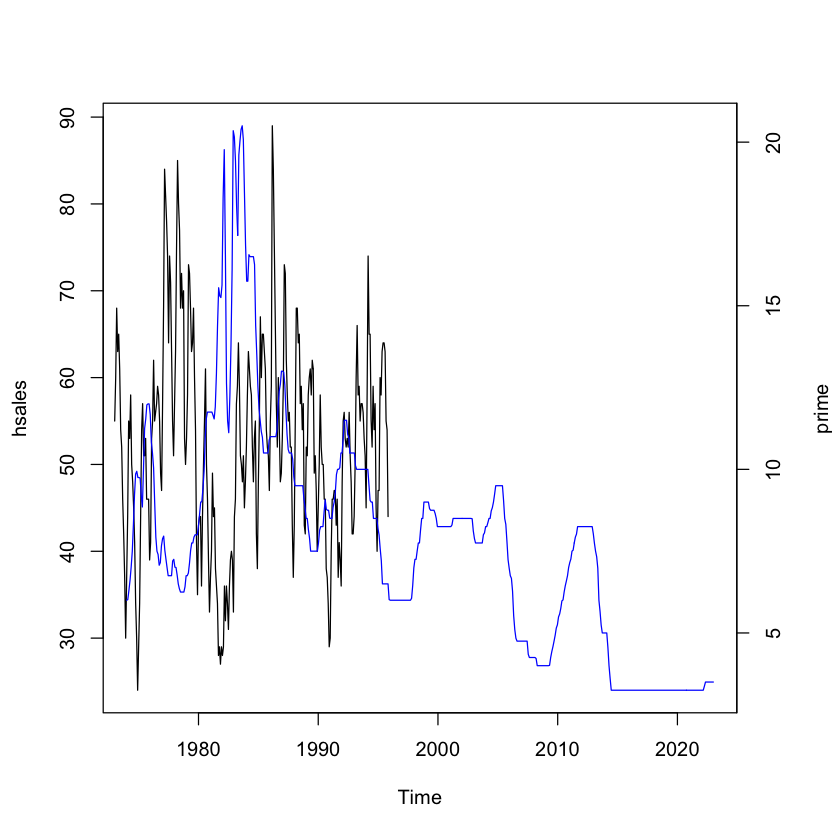

In [22]:
par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for right axis
plot(hsales, xlim = c(as.Date(1973,1), as.Date(2016,7))) # first plot
par(new = TRUE)
plot(prime, col= "blue", type = "l", axes = FALSE, bty = "n", xlab = "", ylab = "")
axis(side=4, at = pretty(range(prime)))
mtext("prime", side=4, line=3)


Notice we have more income data than home sales data here. Linear regression functions do not like this. (See matrix notation section 5/5 in your book for more info.)


In [23]:
model.test<- tslm(hsales ~ prime + season)
length(hsales)
length(prime)

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 524, 275




How can we only play with the time frame that we have data for both series? We could have specified an enddate when we created the prime series.  Or we can take the intersection of the date ranges.



hsales,prime
55,6.00
60,6.02
68,6.30
63,6.61
65,7.01
61,7.49


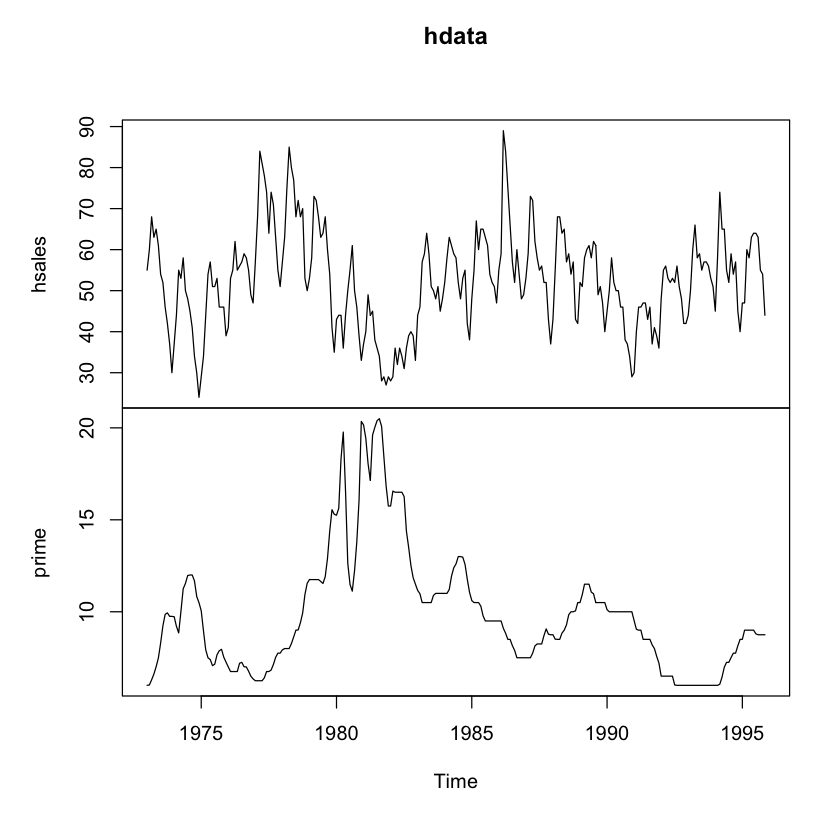

[1] "hsales" "prime"

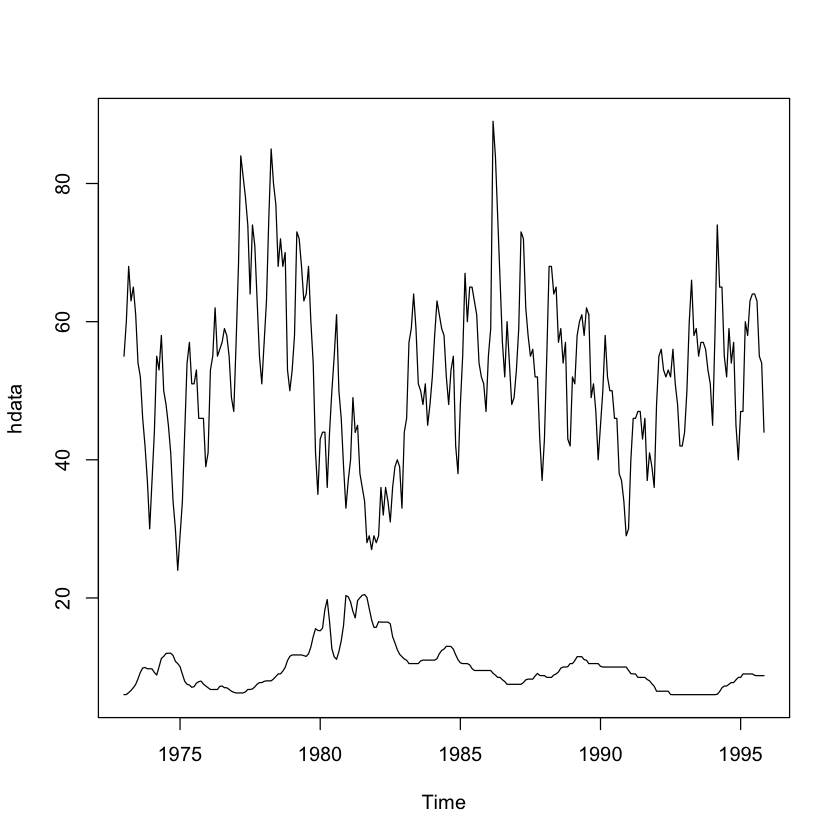

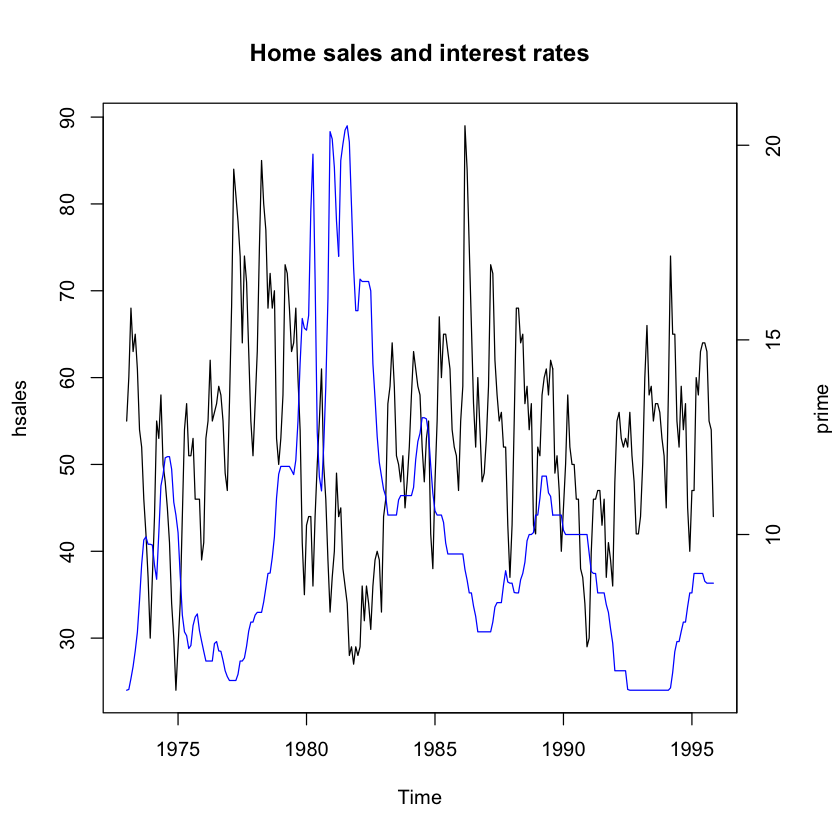

In [24]:
hdata <- ts.intersect(hsales, prime)
head(hdata)

plot(hdata)

#you can put them on one chart but you'll need to change the axes like we did before
plot(hdata, plot.type = "single")



#access mts objects by column number
colnames(hdata)

par(mar = c(5, 4, 4, 4) + 0.3)  # Leave space for right axis
plot(hdata[,1], ylab = "") # first plot
par(new = TRUE)
plot(hdata[,2], col= "blue", type = "l", axes = FALSE, bty = "n", xlab = "", ylab = colnames(hdata)[1], main = "Home sales and interest rates")
axis(side=4, at = pretty(range(hdata[,2])))
mtext(colnames(hdata)[2], side=4, line=3)


Now can we run a model?




In [25]:
hsales_new = hdata[, 1]
prime_new = hdata[, 2]
rates.model1<- tslm(hsales_new ~ prime_new)
summary(rates.model1)

rates.model2<- tslm(hsales_new ~ prime_new + season)
summary(rates.model2)


Call:
tslm(formula = hsales_new ~ prime_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.263  -7.292  -0.612   7.097  35.406 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   68.747      2.031  33.841  < 2e-16 ***
prime_new     -1.665      0.195  -8.538 9.65e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.63 on 273 degrees of freedom
Multiple R-squared:  0.2108,	Adjusted R-squared:  0.2079 
F-statistic:  72.9 on 1 and 273 DF,  p-value: 9.651e-16



Call:
tslm(formula = hsales_new ~ prime_new + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.3458  -6.2804  -0.0081   5.4044  26.5622 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.3375     2.3449  26.158  < 2e-16 ***
prime_new    -1.6307     0.1563 -10.434  < 2e-16 ***
season2       5.6770     2.5099   2.262 0.024529 *  
season3      15.9400     2.5099   6.351 9.41e-10 ***
season4      15.0010     2.5099   5.977 7.41e-09 ***
season5      14.4856     2.5100   5.771 2.22e-08 ***
season6      11.7174     2.5099   4.668 4.85e-06 ***
season7       8.4929     2.5099   3.384 0.000824 ***
season8       9.8379     2.5099   3.920 0.000113 ***
season9       5.7151     2.5100   2.277 0.023598 *  
season10      4.6813     2.5101   1.865 0.063298 .  
season11     -1.9579     2.5100  -0.780 0.436079    
season12     -5.2935     2.5387  -2.085 0.038030 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standar


How are we doing?  Have we come close to meeting our ideal model requirements?  Let's start with autocorrelation in the residuals.



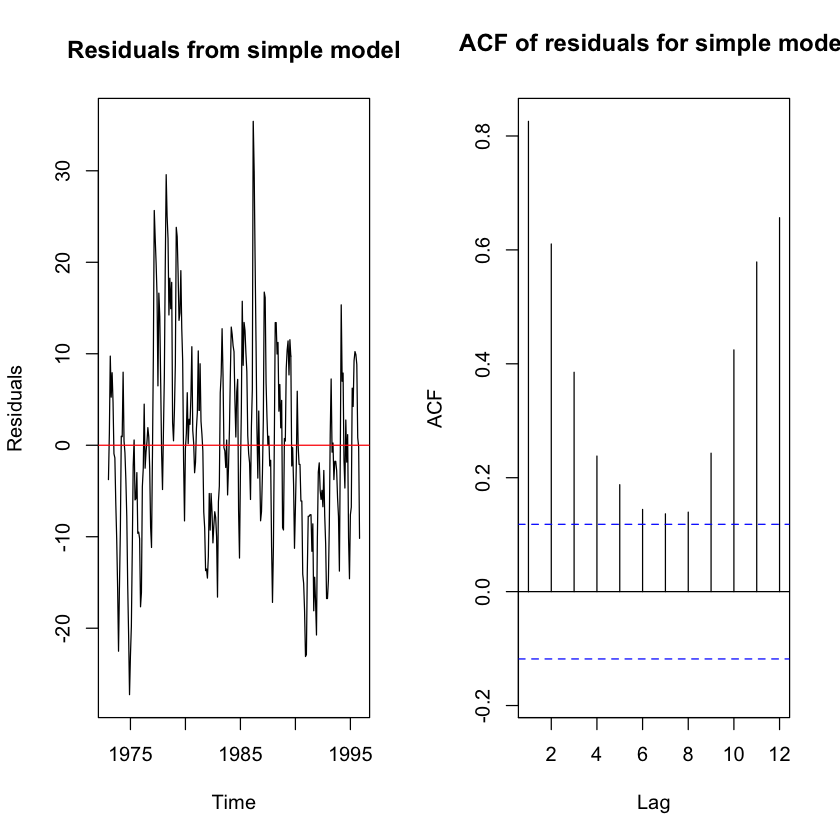

In [26]:
rates.res1 <- residuals(rates.model1)
par(mfrow = c(1,2))
plot(rates.res1, main = "Residuals from simple model", ylab = "Residuals", xlab = "Time")
abline(0,0, col = "red")
Acf(rates.res1, lag.max = 12, main = "ACF of residuals for simple model")


As we've seen before, simple often doesn't quite make it.  How about our model with seasonal effects?



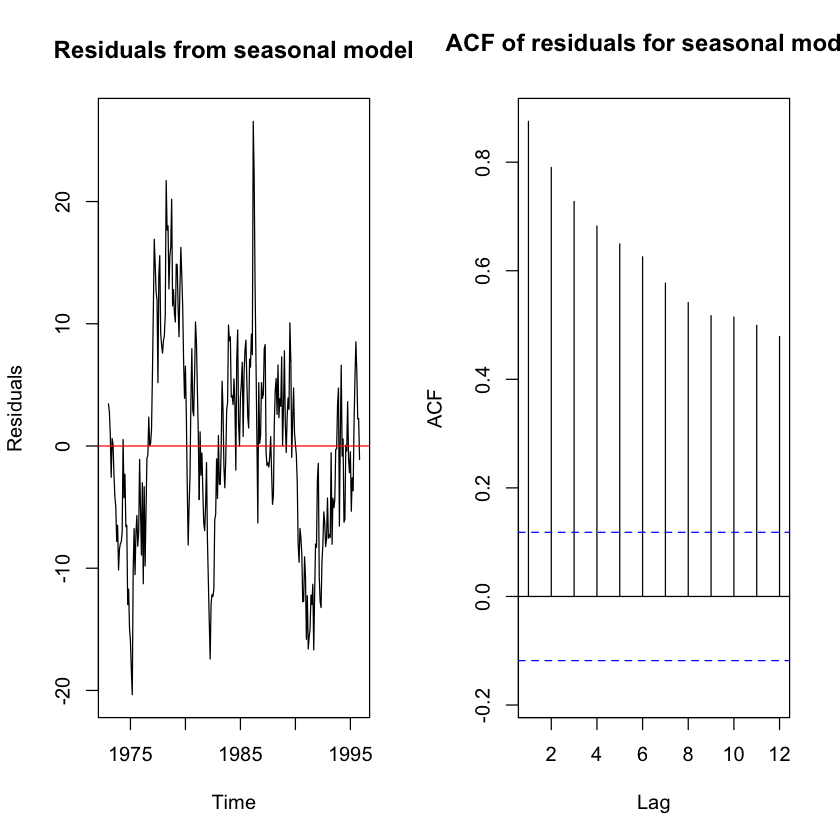

In [27]:
rates.res2 <- residuals(rates.model2)
par(mfrow = c(1,2))
plot(rates.res2, main = "Residuals from seasonal model", ylab = "Residuals", xlab = "Time")
abline(0,0, col = "red")
Acf(rates.res2, lag.max = 12, main = "ACF of residuals for seasonal model")


Not as nice and neat as the beer example in the book.  Is this unexpected given our regression results?

Cleaner example:



In [28]:
beer2 <- window(ausbeer, start = 1992)
fit <- tslm(beer2 ~ trend + season)
summary(fit)


Call:
tslm(formula = beer2 ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.916  -7.877  -0.070   7.594  21.494 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 442.78341    3.98067 111.233  < 2e-16 ***
trend        -0.35886    0.07866  -4.562 2.45e-05 ***
season2     -35.40585    4.26869  -8.294 1.22e-11 ***
season3     -19.28229    4.27086  -4.515 2.89e-05 ***
season4      72.79268    4.33485  16.792  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.44 on 62 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.918 
F-statistic: 185.8 on 4 and 62 DF,  p-value: < 2.2e-16



Hmmm.... High Rsquared and strongly significant seasonal patterns.



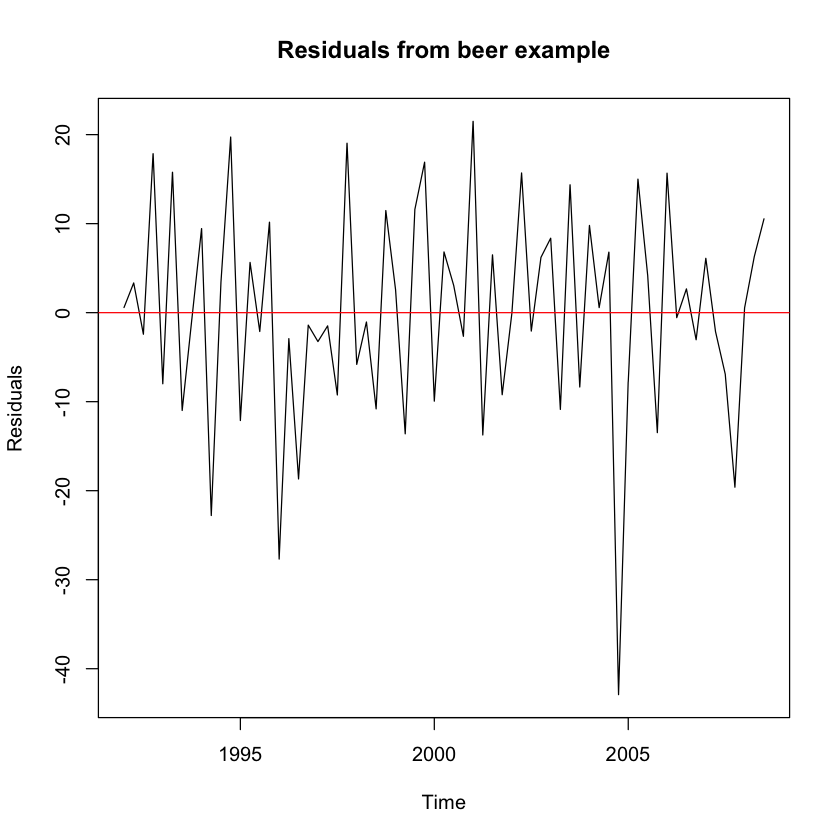

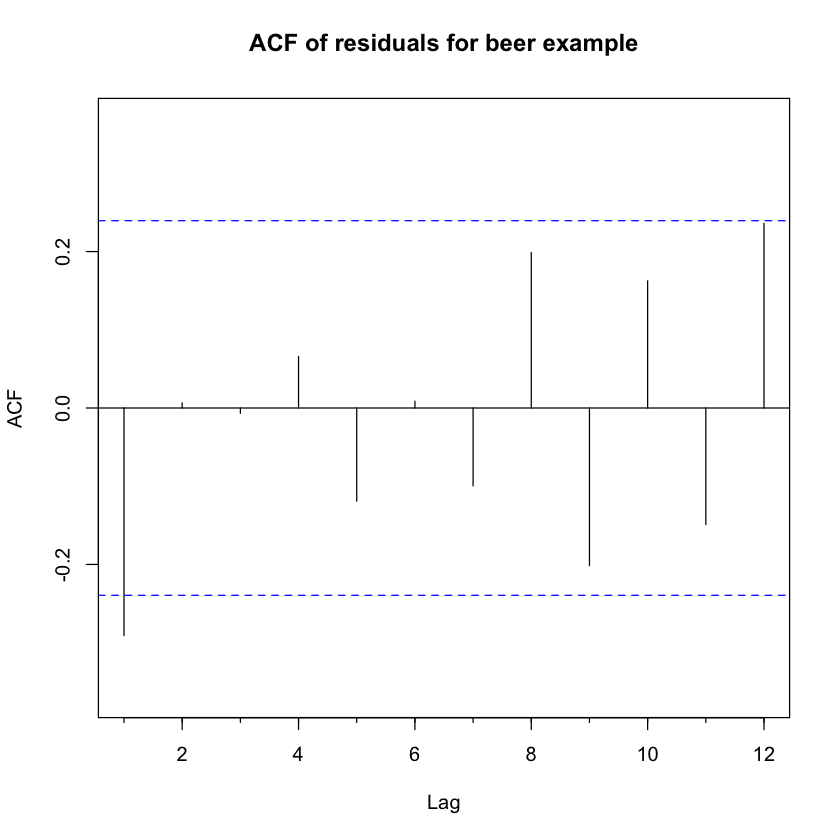

In [29]:
res <- residuals(fit)
plot(res, main = "Residuals from beer example", ylab = "Residuals", xlab = "Time")
abline(0,0, col = "red")
Acf(res, lag.max = 12, main = "ACF of residuals for beer example")


This example shows that there are few lags where the past values contribute to the variation in current values.  We have a test statistic to look at the relationship between adjacent values:  the Durbin Watson statistic.



In [30]:
dwtest(rates.model1, alt = "two.sided")
dwtest(rates.model2, alt = "two.sided")
dwtest(fit, alt = "two.sided")




	Durbin-Watson test

data:  rates.model1
DW = 0.34475, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  rates.model2
DW = 0.24887, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0



	Durbin-Watson test

data:  fit
DW = 2.5705, p-value = 0.02044
alternative hypothesis: true autocorrelation is not 0



There is also the Breush-Godfrey test for higher order autocorrelation.

A great CrossValidated discussion on these statistics as well as the various Box tests: http://stats.stackexchange.com/questions/148004/testing-for-autocorrelation-ljung-box-versus-breusch-godfrey

We'll delve into some of these issues in more detail when we get to ARIMA modelling in a few weeks.
